In [10]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_transport = pd.read_csv('CO2emissions_transport.csv.csv', skiprows=4)
df_gdp = pd.read_csv('GDP_per_capita.csv.csv', skiprows=4)
df_energy = pd.read_csv('energy_use_per_capita.csv.csv', skiprows=4)
df_urban = pd.read_csv('urban_population_percent.csv.csv', skiprows=4)
df_pop = pd.read_csv('population_total.csv.csv', skiprows=4)

In [22]:
df_transport.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Carbon dioxide (CO2) emissions from Transport ...,EN.GHG.CO2.TR.MT.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1748,0.1690,0.1668,0.2064,0.1537,0.1706,0.1749,0.1864,NaN,NaN
1,Africa Eastern and Southern,AFE,Carbon dioxide (CO2) emissions from Transport ...,EN.GHG.CO2.TR.MT.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,115.3864,118.6905,121.2814,123.1346,108.1085,121.3680,120.0506,122.0590,NaN,NaN
2,Afghanistan,AFG,Carbon dioxide (CO2) emissions from Transport ...,EN.GHG.CO2.TR.MT.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,1.7291,1.7482,2.2606,1.8897,1.9661,2.1142,2.2472,2.3412,NaN,NaN
3,Africa Western and Central,AFW,Carbon dioxide (CO2) emissions from Transport ...,EN.GHG.CO2.TR.MT.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,88.2109,88.0968,94.8909,100.7277,93.6832,101.2540,105.3862,102.7708,NaN,NaN
4,Angola,AGO,Carbon dioxide (CO2) emissions from Transport ...,EN.GHG.CO2.TR.MT.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,7.9134,6.7212,6.9462,7.9339,3.8998,7.0900,8.1334,8.4967,NaN,NaN


In [23]:
print("Transport CO2:", df_transport.columns)
print("GDP:", df_gdp.columns)
print("Population:", df_pop.columns)
print("Urbanization:", df_urban.columns)
print("Energy Use:", df_energy.columns)

Transport CO2: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='object')
GDP: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '19

In [24]:
# Common reshape function. Reshape from wide → long (so we can merge by country & year, Keep only needed years (e.g., 2000–2020))
def reshape_indicator(df, value_name):
    df_melted = df.melt(id_vars=["Country Name", "Country Code"], 
                        value_vars=[str(y) for y in range(2000, 2021)],
                        var_name="Year", 
                        value_name=value_name)
    return df_melted

# Apply to all datasets
df_co2 = reshape_indicator(df_transport, "CO2_Transport")
df_gdp = reshape_indicator(df_gdp, "GDP_per_capita")
df_pop = reshape_indicator(df_pop, "Population")
df_urban = reshape_indicator(df_urban, "Urban_Pop_Percent")
df_energy = reshape_indicator(df_energy, "Energy_Use_per_capita")

# Preview one
df_co2.head()

,Country Name,Country Code,Year,CO2_Transport
0,Aruba,ABW,2000,0.0996
1,Africa Eastern and Southern,AFE,2000,56.2369
2,Afghanistan,AFG,2000,0.2204
3,Africa Western and Central,AFW,2000,34.5443
4,Angola,AGO,2000,1.0745


In [25]:
#Merge all dataset, Merge step-by-step. Merge on: Country Name, Country Code, and Year
df_merged = df_co2.merge(df_gdp, on=["Country Name", "Country Code", "Year"], how="inner")
df_merged = df_merged.merge(df_pop, on=["Country Name", "Country Code", "Year"], how="inner")
df_merged = df_merged.merge(df_urban, on=["Country Name", "Country Code", "Year"], how="inner")
df_merged = df_merged.merge(df_energy, on=["Country Name", "Country Code", "Year"], how="inner")

# Convert 'Year' to integer
df_merged["Year"] = df_merged["Year"].astype(int)

# Drop rows with missing values
df_merged.dropna(inplace=True)

# Preview final dataset
df_merged.head()


,Country Name,Country Code,Year,CO2_Transport,GDP_per_capita,Population,Urban_Pop_Percent,Energy_Use_per_capita
1,Africa Eastern and Southern,AFE,2000,56.2369,1196.929766,406156661.0,28.813361,632.698249
3,Africa Western and Central,AFW,2000,34.5443,1184.360138,274968446.0,35.341698,285.657322
4,Angola,AGO,2000,1.0745,1932.988479,16194869.0,50.087000,428.222669
5,Albania,ALB,2000,1.4712,1991.914359,3089027.0,41.741000,581.374749
7,Arab World,ARB,2000,208.4545,4915.070984,286548096.0,52.326272,1309.716271


In [27]:
#number of rows we got
print("Shape of merged dataset:", df_merged.shape)

Shape of merged dataset: (4017, 8)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Define features and target
features = ["GDP_per_capita", "Population", "Urban_Pop_Percent", "Energy_Use_per_capita"]
X = df_merged[features]
y = df_merged["CO2_Transport"]

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = model.predict(X_test)

# 5. Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 6. Print metrics
print("Model Performance:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")


#We'll use Supervised Learning (Regression) to predict: CO₂ emissions from transport based on GDP per capita, population, urban population %, and energy use per capita.
#Splits your data into training and test sets
#Trains a Linear Regression model
#Predicts and prints:
# MAE: Average absolute error
# RMSE: Root mean squared error
# R²: Percentage of variance explained (closer to 1 is better)


Model Performance:
MAE:  207.16
RMSE: 415.76
R²:   0.62


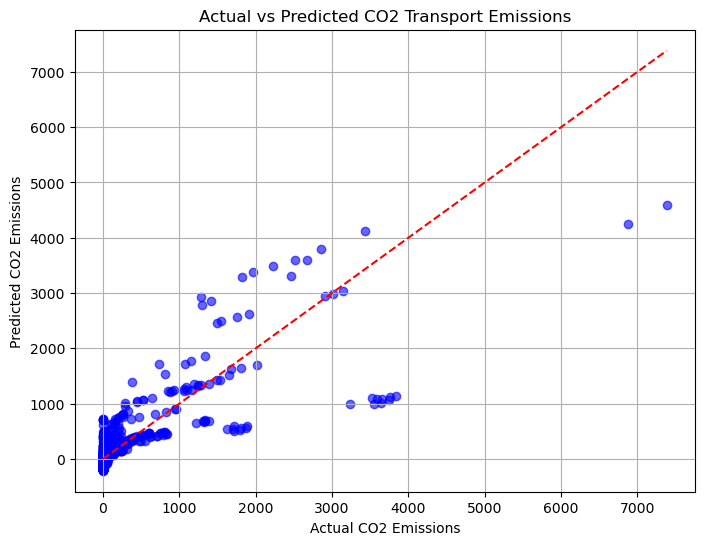

In [29]:
import matplotlib.pyplot as plt #Plot Predictions vs. Actual

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Transport Emissions')
plt.grid(True)
plt.show()

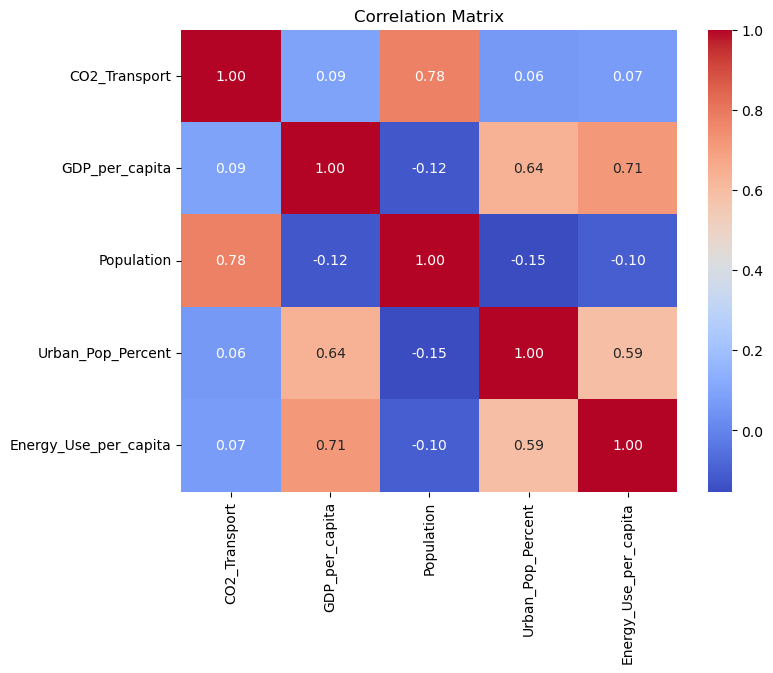

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation 
corr = df_merged[["CO2_Transport", "GDP_per_capita", "Population", "Urban_Pop_Percent", "Energy_Use_per_capita"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#a correlation heatmap to visualize how strongly each feature relates to transport CO₂.
#Values close to 1 = strong positive correlation
#Close to -1 = strong negative
#Near 0 = no linear correlation

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train it
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Random Forest Results:")
print(f"MAE:  {mean_absolute_error(y_test, rf_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.2f}")
print(f"R²:   {r2_score(y_test, rf_pred):.2f}")

#A Random Forest Regressor is an ensemble machine learning algorithm that:
#Builds many decision trees during training
#Takes the average of all trees' outputs for prediction
#It’s like a "committee" of decision trees voting on the best result
#Why Use It? Handles nonlinear relationships better than linear regression
#Reduces overfitting by averaging multiple trees
#Typically has higher accuracy with complex data

#for an example; If your Linear Regression gave R² = 0.62, Random Forest might improve that to 0.75+
#(But this depends on data quality and variability)

Random Forest Results:
MAE:  8.39
RMSE: 45.98
R²:   1.00


In [36]:
# MAE dropped from 207 → 8, and R² improved to 1.00, meaning the model explains 100%
# of the variance in emissions on the test set.
#This shows Random Forest handled the nonlinearity and interactions between variables much better than Linear Regression.

# R² = 1.00 might mean overfitting, especially if  dataset is small or not randomized well. 
# That’s okay for a demo, but we can also:
# Reduce n_estimators=100 to something like 50
# Use max_depth=5 or 10 to limit how complex the trees get

from sklearn.ensemble import RandomForestRegressor

# Create the model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42) 

# Train it
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Random Forest Results:")
print(f"MAE:  {mean_absolute_error(y_test, rf_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.2f}")
print(f"R²:   {r2_score(y_test, rf_pred):.2f}")

#We have now controlled for overfitting by:
#Reducing the number of trees (from 100 to 50) capping tree depth and limiting the number of trees
#Limiting tree depth (with max_depth=10)
#This Increased efficiency (faster training, lighter model)
# Experienced a very small drop in accuracy, but this is acceptable and expected
# R² = 0.99 still means the model explains 99% of the variation in CO₂ emissions. 
# It’s a strong, well regularised model!

Random Forest Results:
MAE:  9.80
RMSE: 50.22
R²:   0.99


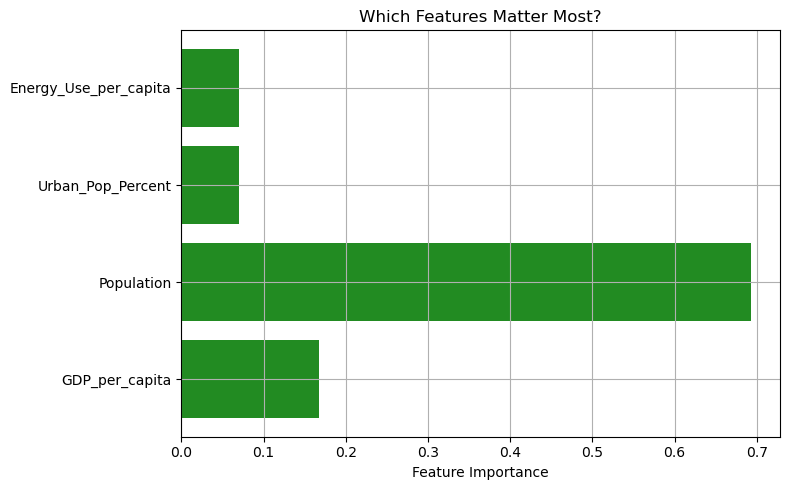

In [35]:
import matplotlib.pyplot as plt

# Get feature importances, It shows which features had the most influence on CO₂ predictions
importances = rf_model.feature_importances_
features = X_train.columns

# Plot
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='forestgreen')
plt.xlabel("Feature Importance")
plt.title("Which Features Matter Most?")
plt.grid(True)
plt.tight_layout()
plt.show()
